In [9]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import tensorflow as tf
import imageio

In [48]:
indicator_reshaped = tf.convert_to_tensor(np.load("../data/fov_indicator.npy").reshape((1,800,1280)), dtype=tf.float32)

In [4]:
import utils as ut

In [49]:
# generated_lossfunc = ut.SSIMLoss_l1_indicator_generator(indicator_reshaped)

In [7]:
import preset_nn

model = preset_nn.instant_multiwienernet()
# model = preset_nn.instant_multiwienernet(pooling='averageblur')

# model.load_weights("saved_models/multiwiener_nV3_probe_noisy2/model_weights")
# model.load_weights("saved_models/multiwiener_nV3_probe_noisy4/model_weights")
# model.load_weights("saved_models/multiwiener_nV3_probe_noisy5/model_weights")
# model.load_weights("saved_models/multiwiener_nV3_probe_equivariant/model_weights")
# model.load_weights("saved_models/multiwiener/model_weights")
# model.load_weights("saved_models/multiwiener_nV3_probe_noisy3/model_weights")
# model.load_weights("saved_models/multiwiener_nV3_probe/model_weights")
# weights_path = "saved_models/multiwiener_nV3_probe_noisy4/model_weights"
# weights_path = "saved_models/multiwiener_nV3_probe_noisy5/model_weights"
weights_path = "saved_models/multiwiener_nV3_probe_noisy5_new_way/model_weights"
# weights_path = "saved_models/multiwiener_nV3_probe_equivariant/model_weights"
# weights_path = "saved_models/multiwiener_nV3_probe/model_weights"
model.load_weights(weights_path)

/tmp/ipykernel_10742/890868392.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sim = imageio.imread("../data/nV3_mastermat_probe_undistorted_corrected/100.png")


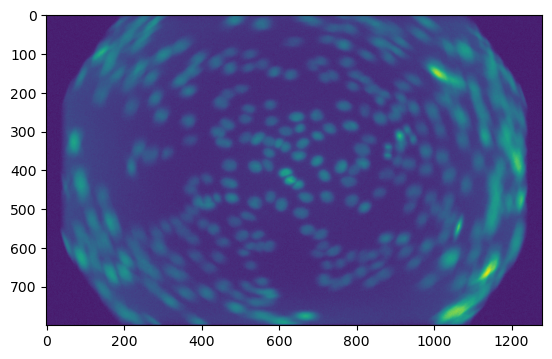

In [13]:
sim = imageio.imread("../data/nV3_mastermat_probe_undistorted_corrected/100.png")

plt.imshow(sim)

/tmp/ipykernel_10742/144895330.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gt = imageio.imread("../data/nV3_resized/100.png")


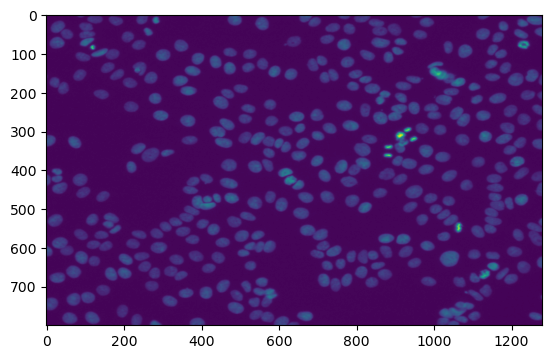

In [14]:
gt = imageio.imread("../data/nV3_resized/100.png")

plt.imshow(gt)

In [30]:
indicator_legacy = tf.convert_to_tensor(np.load("../data/fov_indicator.npy").reshape((1,800,1280,1)), dtype=tf.float32)

In [31]:
%debug
ut.SSIMLoss_l1_indicator(model, sim.reshape((1,800,1280,1)), gt.reshape((1,800,1280,1)), indicator_legacy)

> /home/dshteinbok/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/ops.py(7209)raise_from_not_ok_status()
   7207 def raise_from_not_ok_status(e, name):
   7208   e.message += (" name: " + name if name is not None else "")
-> 7209   raise core._status_to_exception(e) from None  # pylint: disable=protected-access
   7210 
   7211 

ipdb> c


<tf.Tensor: shape=(1, 800, 1280), dtype=float32, numpy=
array([[[0.9068058, 0.9068058, 0.9068058, ..., 0.9068058, 0.9068058,
         0.9068058],
        [0.9068058, 0.9068058, 0.9068058, ..., 0.9068058, 0.9068058,
         0.9068058],
        [0.9068058, 0.9068058, 0.9068058, ..., 0.9068058, 0.9068058,
         0.9068058],
        ...,
        [0.9068058, 0.9068058, 0.9068058, ..., 0.9068058, 0.9068058,
         0.9068058],
        [0.9068058, 0.9068058, 0.9068058, ..., 0.9068058, 0.9068058,
         0.9068058],
        [0.9068058, 0.9068058, 0.9068058, ..., 0.9068058, 0.9068058,
         0.9068058]]], dtype=float32)>

In [57]:
generated_lossfunc = ut.SSIMLoss_l1_indicator_generator(indicator_legacy)

In [33]:
generated_lossfunc?

In [44]:
model(sim.reshape((1,800,1280,1))).shape

TensorShape([1, 800, 1280])

In [58]:
%debug
generated_lossfunc(tf.convert_to_tensor(gt.reshape((1,800,1280,1)), dtype=tf.float32),
                  tf.expand_dims(model(sim.reshape((1,800,1280,1))), -1))

> /home/dshteinbok/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/ops.py(7209)raise_from_not_ok_status()
   7207 def raise_from_not_ok_status(e, name):
   7208   e.message += (" name: " + name if name is not None else "")
-> 7209   raise core._status_to_exception(e) from None  # pylint: disable=protected-access
   7210 
   7211 

ipdb> c
y_true.shape:  (1, 800, 1280, 1)
y_pred.shape:  (1, 800, 1280, 1)


<tf.Tensor: shape=(1, 800, 1280), dtype=float32, numpy=
array([[[0.9065057, 0.9065057, 0.9065057, ..., 0.9065057, 0.9065057,
         0.9065057],
        [0.9065057, 0.9065057, 0.9065057, ..., 0.9065057, 0.9065057,
         0.9065057],
        [0.9065057, 0.9065057, 0.9065057, ..., 0.9065057, 0.9065057,
         0.9065057],
        ...,
        [0.9065057, 0.9065057, 0.9065057, ..., 0.9065057, 0.9065057,
         0.9065057],
        [0.9065057, 0.9065057, 0.9065057, ..., 0.9065057, 0.9065057,
         0.9065057],
        [0.9065057, 0.9065057, 0.9065057, ..., 0.9065057, 0.9065057,
         0.9065057]]], dtype=float32)>

In [63]:
np.any((generated_lossfunc(tf.convert_to_tensor(gt.reshape((1,800,1280,1)), dtype=tf.float32),
                  tf.expand_dims(model(sim.reshape((1,800,1280,1))), -1))
      -
      ut.SSIMLoss_l1_indicator(model, sim.reshape((1,800,1280,1)), gt.reshape((1,800,1280,1)), indicator_legacy).numpy()))

y_true.shape:  (1, 800, 1280, 1)
y_pred.shape:  (1, 800, 1280, 1)


True

In [64]:
(generated_lossfunc(tf.convert_to_tensor(gt.reshape((1,800,1280,1)), dtype=tf.float32),
                  tf.expand_dims(model(sim.reshape((1,800,1280,1))), -1))
      -
      ut.SSIMLoss_l1_indicator(model, sim.reshape((1,800,1280,1)), gt.reshape((1,800,1280,1)), indicator_legacy).numpy())

y_true.shape:  (1, 800, 1280, 1)
y_pred.shape:  (1, 800, 1280, 1)


<tf.Tensor: shape=(1, 800, 1280), dtype=float32, numpy=
array([[[-0.00020856, -0.00020856, -0.00020856, ..., -0.00020856,
         -0.00020856, -0.00020856],
        [-0.00020856, -0.00020856, -0.00020856, ..., -0.00020856,
         -0.00020856, -0.00020856],
        [-0.00020856, -0.00020856, -0.00020856, ..., -0.00020856,
         -0.00020856, -0.00020856],
        ...,
        [-0.00020856, -0.00020856, -0.00020856, ..., -0.00020856,
         -0.00020856, -0.00020856],
        [-0.00020856, -0.00020856, -0.00020856, ..., -0.00020856,
         -0.00020856, -0.00020856],
        [-0.00020856, -0.00020856, -0.00020856, ..., -0.00020856,
         -0.00020856, -0.00020856]]], dtype=float32)>